In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [43]:
cancer = pd.read_csv('data.csv')

In [44]:
def encode_Diagnosis(x):
  if x == "B":
    return 0
  elif x == "M":
    return 1
cancer["encode_Diagnosis"] = cancer.apply(lambda x: encode_Diagnosis(x["Diagnosis"]),axis=1)

In [45]:
y = cancer[['encode_Diagnosis']]
x = cancer.drop(columns=['Diagnosis','encode_Diagnosis','ID',], axis=1)

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=49)


In [47]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(x_train,y_train.values.ravel())
predictions = rf_model.predict(x_test)


In [48]:
print("RandomForest Accuracy:",accuracy_score(y_test, predictions))
print("RandomForest Precision:",precision_score(y_test, predictions))
print("RandomForest Recall:",recall_score(y_test, predictions))
print("RandomForest F1-score:",f1_score(y_test, predictions))


RandomForest Accuracy: 0.9532163742690059
RandomForest Precision: 0.9523809523809523
RandomForest Recall: 0.9230769230769231
RandomForest F1-score: 0.9375


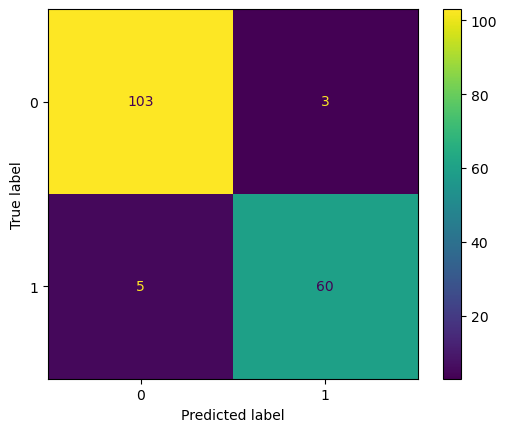

In [49]:
cm = confusion_matrix(y_test, predictions,labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.show()

In [50]:
 y_score = rf_model.predict_proba(x_test)[:,1]

In [51]:
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_score)
print('roc_auc_score  Random Forest: ', roc_auc_score(y_test, y_score))

roc_auc_score  Random Forest:  0.9912191582002903


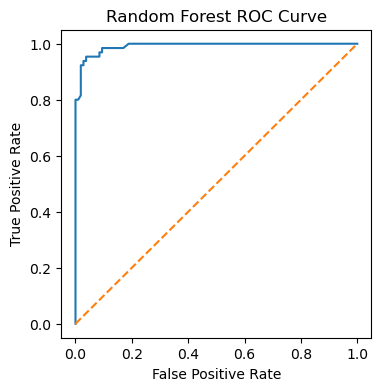

In [52]:
plt.subplots(1, figsize=(4,4))
plt.title('Random Forest ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()